# 1. First Steps with FastAPI.

In [1]:
from fastapi import FastAPI

app: FastAPI = FastAPI()

* **`Routes:`** in FastAPI are like **sign-posts** that direct requests to the appropriate function.

In [2]:
@app.get(path="/")  # endpoint of the root url
def read_root() -> dict[str, str]:
    return {"Hello": "World"}

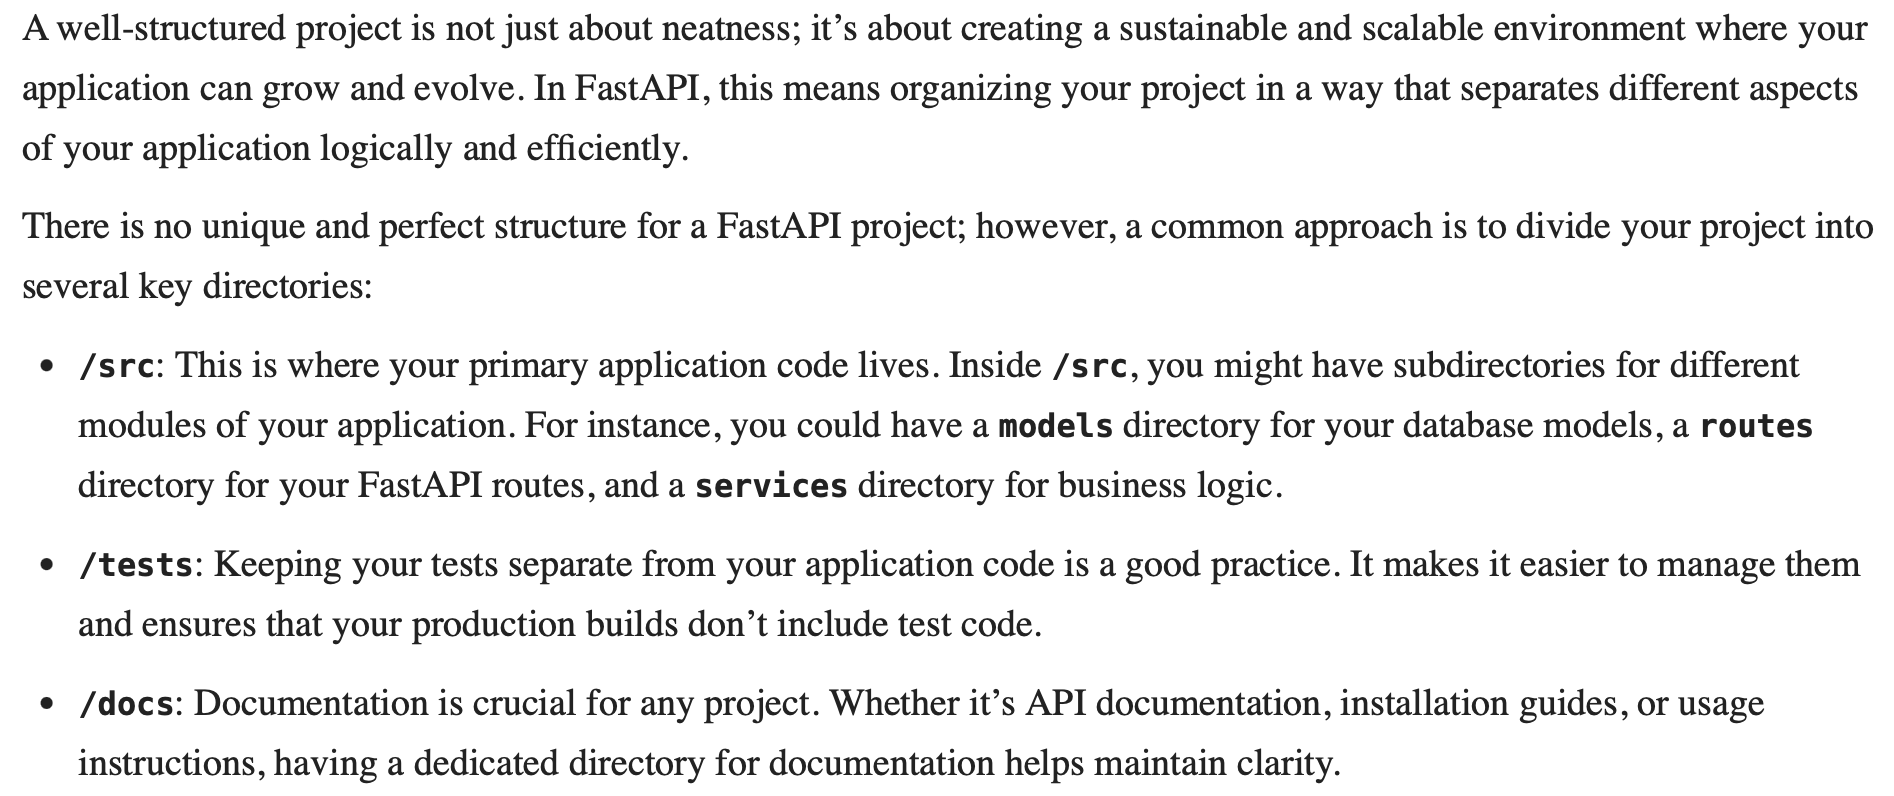

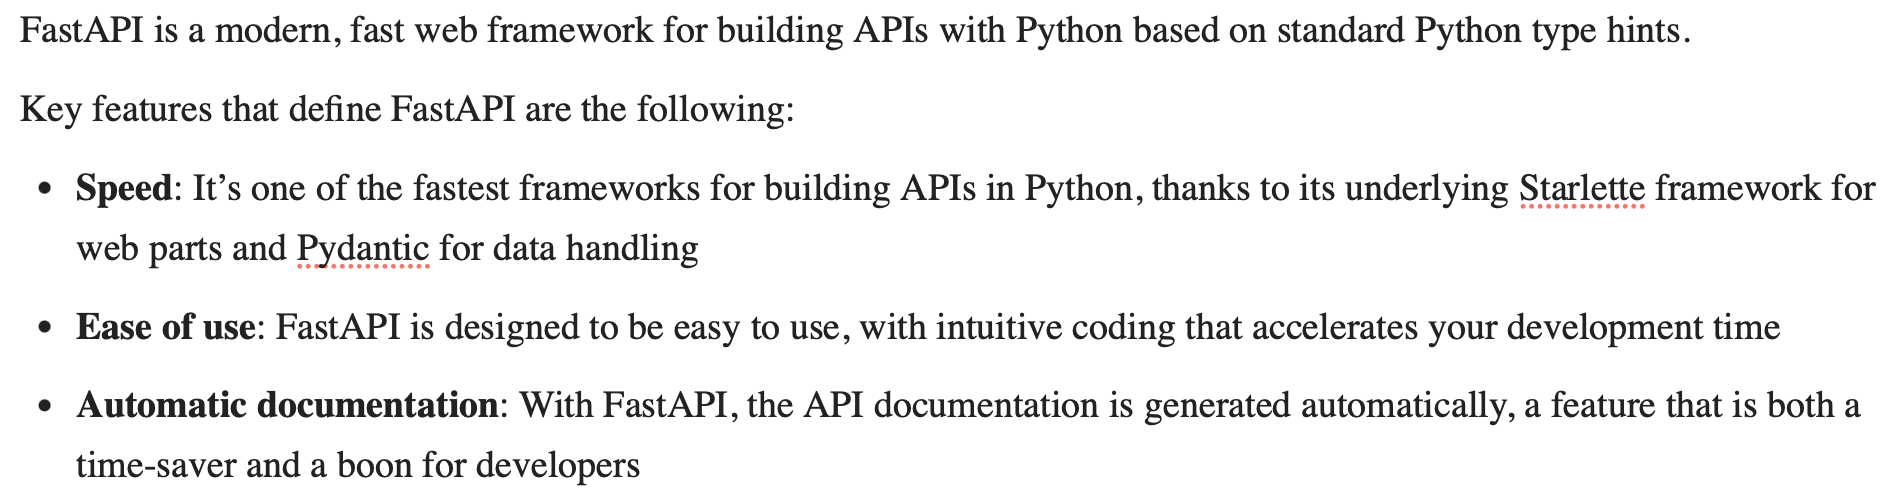

In [3]:
@app.get(path="/")  # endpoint of the root url
async def read_root() -> dict[str, str]:
    return {"Hello": "World"}

## Routers
When we need to **handle multiple endpoints** that are in different files, we can use **Routers**. With Routers we can **group** multiple endpoints together in a single place (module).

In [4]:
from fastapi import APIRouter

router: APIRouter = APIRouter()


@router.get(path="/items/{item_id}")  # item_id is the 'Path Parameter'
async def read_item(item_id: int) -> dict[str, int]:
    return {"item_id": item_id}

```python
# in the main.py module
from fastapi_start import router_example

app: FastAPI = FastAPI()
app.include_router(router=router_example.router) # include the router
```

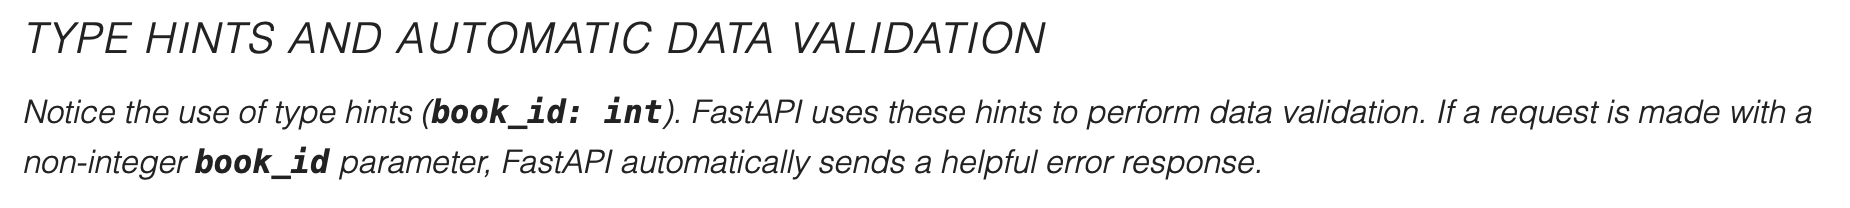

In [5]:
from fastapi import FastAPI

app: FastAPI = FastAPI()


@app.get(path="/books/{book_id}")
async def read_book(book_id: int) -> dict[str, int | str]:
    if book_id == 44:
        return {
            "book_id": book_id,
            "title": "The Lord of the Rings",
            "author": "J.R.R. Tolkien",
        }
    else:
        return {"error": "Book not found"}

## Path Parameters and Query Parameters
**Parameters:** allow our API to accept **user inputs** which make our Endpoints **dynamic** and **responsive**.


**Path Parameters:** are part of the **URL Path** and are **required** that are expected to change. For example: `/books/{book_id}`, `book_id` is the **Path Parameter**.

**Query Parameters:** are parts of the URL but not the Path and optional unless specified as **required**. **Query parameters** are a way to pass data to your application via the URL. They are the part of the URL that comes after the `?` symbol and are typically used to **filter, sort**, or provide additional information to the server.

For example: `/books?year=2022`, `year` is the **Query Parameter**

In FastAPI, you **define query parameters** by declaring function parameters that are not part of the path parameters. FastAPI will automatically recognize them as query parameters.


In [6]:
@app.get(path="/authors/{author_id}")
async def read_author(author_id: int) -> dict[str, int | str]:
    if author_id == 44:
        return {
            "author_id": author_id,
            "first_name": "J.R.R.",
            "last_name": "Tolkien",
        }
    else:
        return {"error": "Author not found"}

In [8]:
from typing import Optional


@app.get(path="/books")
async def read_books(year: Optional[int] = None) -> dict[str, int | str | list]:
    if year:
        return {"year": year, "books": ["Book1", "Book 2"]}
    return {"books": ["All Books"]}

## Creating the Model

In [10]:
from pydantic import BaseModel


class Book(BaseModel):
    title: str
    author: str
    year: int

## Defining the request body

In [11]:
@router.post(path="/book")
async def create_book(book: Book) -> Book:
    return book

In [12]:
from enum import Enum


class Color(Enum):
    RED = 1
    GREEN = 2
    BLUE = 3


In [13]:
# Access by name
print(Color.RED)  # Output: Color.RED

# Access by value
print(Color(1))  # Output: Color.RED

# Access by name string
print(Color["GREEN"])  # Output: Color.GREEN


Color.RED
Color.RED
Color.GREEN


In [14]:
print(Color.RED.name)  # Output: RED
print(Color.RED.value)  # Output: 1


RED
1


In [16]:
from enum import Enum, auto


class Animal(Enum):
    DOG = auto()
    CAT = auto()
    HORSE = auto()


print(list(Animal))
# Output: [<Animal.DOG: 1>, <Animal.CAT: 2>, <Animal.HORSE: 3>]


[<Animal.DOG: 1>, <Animal.CAT: 2>, <Animal.HORSE: 3>]


## Ways to take User Inputs in FastAPI
1. **Path Parameters**
2. **Query Parameters**
3. **Request Body**


| Parameter Type      | Typical HTTP Methods | Purpose                                                      | Example URL                       |
|---------------------|----------------------|--------------------------------------------------------------|-----------------------------------|
| **Path Parameter**  | `GET`, `DELETE`      | Identifies specific resources directly in the URL path       | `/books/123`                      |
| **Query Parameter** | `GET`                | Optional filters or customizations for the request           | `/books/?author=John&year=2023`   |
| **Request Body**    | `POST`, `PUT`, `PATCH` | Sends structured data for resource creation or updates        | `/books/` (with JSON payload)     |

These three ways cover the majority of use cases for capturing input in FastAPI and allow you to handle a wide variety of API interactions efficiently.

### 1. Path Parameters

Path parameters are part of the URL path itself and are used to capture variables directly from the URL structure. They are defined within curly braces `{}` in the URL path. Path parameters are typically used to identify a specific resource, like a user by ID or a specific book in a collection.

**Example:**

```python
from fastapi import FastAPI

app = FastAPI()

@app.get("/books/{book_id}")
async def get_book(book_id: int):
    return {"book_id": book_id}
```

In this example:
- `book_id` is a path parameter that will capture any integer value in place of `{book_id}` in the URL, e.g., `/books/123`.
- This approach is ideal for **retrieving**, **updating**, or **deleting** a specific resource by its unique identifier.

### 2. Query Parameters

Query parameters are appended to the URL after a `?` and provide additional information to filter or customize the request. They are commonly used for optional parameters, search criteria, or for filtering data. Unlike path parameters, they’re not required unless specified as such in the function signature.

**Example:**

```python
@app.get("/books/")
async def get_books(author: str = None, year: int = None):
    return {"author": author, "year": year}
```

In this example:
- The parameters `author` and `year` are query parameters. They can be included in the request as `/books/?author=John&year=2023`.
- If you don’t provide them, they default to `None`.
- Query parameters are flexible and commonly used for optional or filtering criteria in `GET` requests.

### 3. Request Body

The request body is used to send structured data, typically in JSON format, especially when dealing with complex inputs like objects or data with multiple fields. FastAPI uses Pydantic models to define and validate the request body, which is commonly used in `POST`, `PUT`, and `PATCH` requests where you need to create or update resources.

**Example:**

```python
from pydantic import BaseModel

class Book(BaseModel):
    title: str
    author: str
    year: int
    genre: str

@app.post("/books/")
async def create_book(book: Book):
    return book
```

In this example:
- `book` is a request body parameter. When you `POST` data to `/books/`, it expects a JSON payload with fields like `title`, `author`, `year`, and `genre`.
- This approach is ideal for complex or nested data, as FastAPI will validate the entire object based on the Pydantic model.
  

## Validating Request Data

In [1]:
from enum import Enum

from pydantic import BaseModel, Field


class BookGenre(Enum):
    fiction = "FICTION F"
    horror = "HORROR H"


class Book(BaseModel):
    title: str = Field(
        default=...,
        title="Book Title",
        description="The title of the book",
        max_length=100,
    )
    author: str = Field(
        default=...,
        title="Book Author",
        description="The author of the book",
        max_length=50,
    )
    year: int = Field(
        default=...,
        title="Book Year",
        description="The year the book was published",
        gt=0,
        lt=2024,
    )
    genre: BookGenre = Field(
        default=..., title="Book Genre", description="The genre of the book"
    )

## Managing Response Format

In [2]:
class BookResponse(BaseModel):
    title: str
    author: str

In [4]:
from fastapi import APIRouter

router: APIRouter = APIRouter()


@router.get(path="/allbooks")
async def read_all_books() -> list[BookResponse]:
    return [
        BookResponse(title="Book1", author="Author1"),
        BookResponse(title="Book2", author="Author2"),
    ]